# PR√ÅCTICA 1
# CUANTIFICACI√ìN UNIFORME Y DITHERING

## La clase uniformeSQ
La clase UniformSQ implementada en scalib permite construir cuantificadores uniformes a partir
de una tasa de bits por muestra deseada (que establece el n√∫mero de niveles de cuantificaci√≥n) y el
rango de entrada del cuantificador (rango de las se√±ales que vamos a cuantificar). A continuaci√≥n se
muestra un ejemplo de uso de UniformSQ para cuantificar una se√±al unidimensional

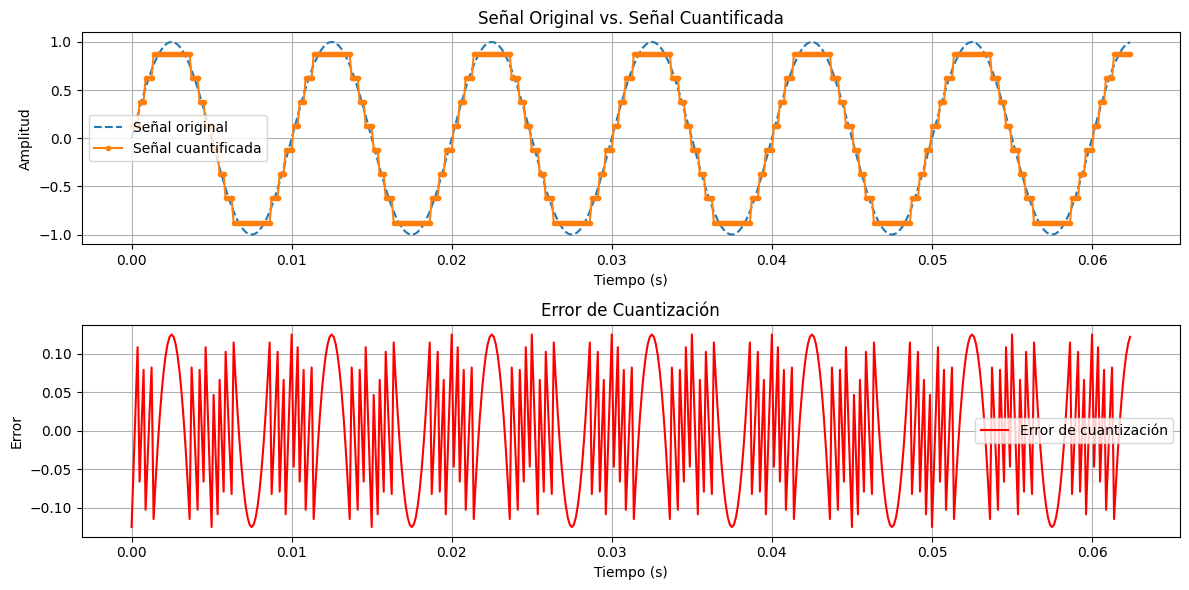

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ

#? Par√°metros de la se√±al
fs = 8000  # Frecuencia de muestreo de 8 kHz
t = np.arange(0, 2, 1/fs)  # Vector de tiempos de 2 segundos de duraci√≥n
x = np.sin(2 * np.pi * 100 * t)  # Se√±al sinusoidal de 100 Hz

#? Configuraci√≥n de la cuantizaci√≥n
xRange = (-1, 1)  # Rango de la se√±al x
b = 3  # N√∫mero de bits por muestra

#? Cuantificaci√≥n uniforme
qtz = UniformSQ(b, xRange)  # Creaci√≥n del cuantificador
xq = qtz.quantize(x)  # Cuantificaci√≥n de la se√±al

#? C√°lculo del error de cuantizaci√≥n
error = x - xq

#? Representacioes gr√°ficas
plt.figure(figsize=(12, 6))

# Gr√°fica de la se√±al original y cuantificada
plt.subplot(2, 1, 1)
plt.plot(t[:500], x[:500], label="Se√±al original", linestyle='dashed')
plt.plot(t[:500], xq[:500], label="Se√±al cuantificada", marker='o', markersize=3)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Se√±al Original vs. Se√±al Cuantificada")
plt.legend()
plt.grid()

# Gr√°fica del error de cuantizaci√≥n
plt.subplot(2, 1, 2)
plt.plot(t[:500], error[:500], color="red", label="Error de cuantizaci√≥n")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error")
plt.title("Error de Cuantizaci√≥n")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# Ejercicio 1

Construya dos cuantificadores uniformes, uno de media contrahuella y otro de media huella. En ambos casos, la tasa de bits por muestra resultante debe ser de 3 bits. Use ambos cuantificadores para cuantificar 3 se√±ales:

- Una se√±al sinusoidal de 50 Hz y 1 s de duraci√≥n muestreada a 8 kHz.
- La se√±al de voz almacenada en el archivo `altura.wav`.
- La imagen de Lena (almacenada en el archivo `lena.png`).

Calcule la SNR de cuantificaci√≥n para todas las se√±ales cuantificadas (6 en total), reproduzca las se√±ales de voz y represente las im√°genes. Comente las diferencias en cuanto a SNR y calidad percibida de las se√±ales, comparando los dos cuantificadores.

En base a los resultados obtenidos, indique justificadamente las ventajas e inconvenientes de los cuantificadores de media contrahuella y los de media huella.


SNR Se√±al Sinusoidal - Midrise: 19.11 dB
SNR Se√±al Sinusoidal - Midtread: 17.90 dB
SNR Imagen - Midrise: 15.60 dB
SNR Imagen - Midtread: 12.90 dB
SNR Se√±al de Voz - Midrise: -1.43 dB
SNR Se√±al de Voz - Midtread: 5.03 dB
Reproduciendo se√±al cuantificada - Midrise...
Reproduciendo se√±al cuantificada - Midtread...


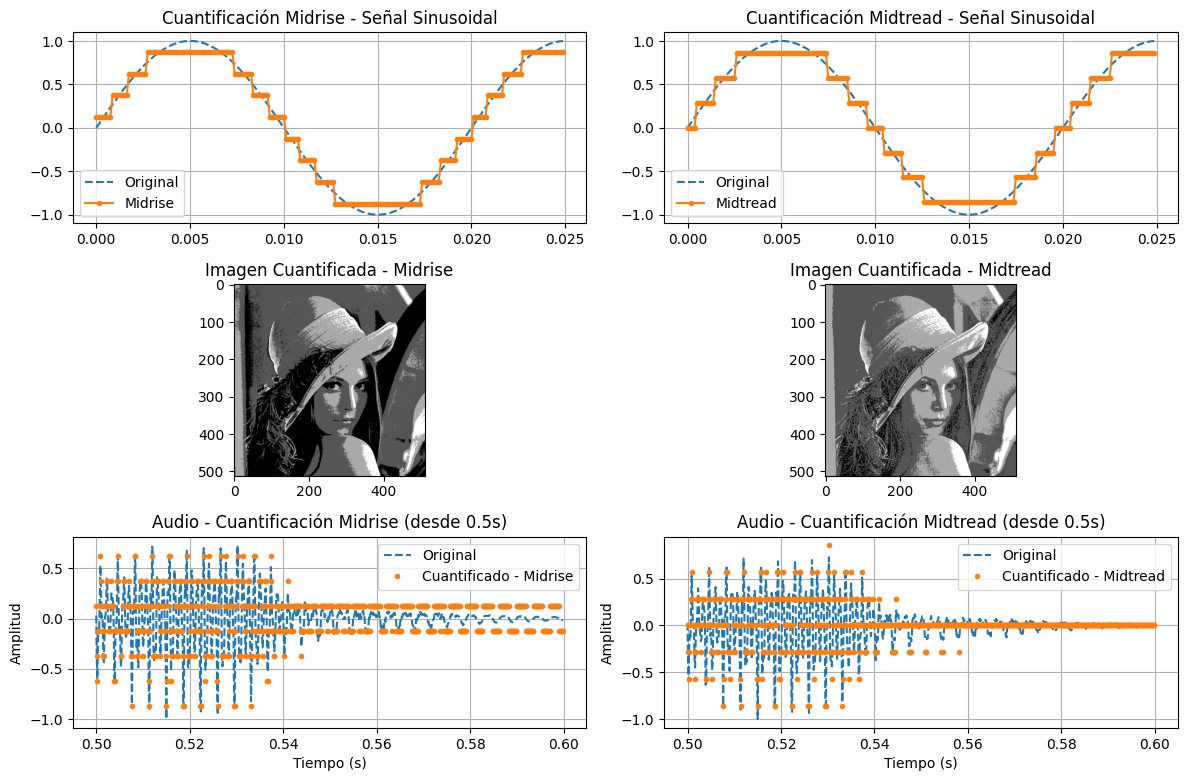

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from skimage import io, color
from scalib import UniformSQ, snr
from scipy.io import wavfile
import os


#? 1. Generar una se√±al sinusoidal de 50 Hz muestreada a 8 kHz
fs = 8000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # 1 segundo de duraci√≥n
x_sin = np.sin(2 * np.pi * 50 * t)  # Se√±al sinusoidal

#? 2. Cargar la se√±al de voz altura.wav
fs_audio, x_audio = wavfile.read("Datos/altura.wav")  # Leer archivo de audio
x_audio = x_audio / np.max(np.abs(x_audio))   # Normalizar a rango (-1,1)

#? 3. Cargar la imagen lena.png en escala de grises
img = io.imread("Datos/lena.png")
img_gray = color.rgb2gray(img)  # Convertir a escala de grises
img_gray = img_gray / np.max(img_gray)  # Normalizar a (0,1)

#? Configuraci√≥n de cuantificadores
b = 3               # 3 bits por muestra
xRange = (-1, 1)    # Rango de entrada

qtz_midrise = UniformSQ(b, xRange, qtype="midrise")   # Cuantificador de media contrahuella
qtz_midtread = UniformSQ(b, xRange, qtype="midtread") # Cuantificador de media huella

# Cuantificaci√≥n de la se√±al sinusoidal
xq_sin_midrise = qtz_midrise.quantize(x_sin)
xq_sin_midtread = qtz_midtread.quantize(x_sin)
# Cuantificaci√≥n de la se√±al de voz
xq_audio_midrise = qtz_midrise.quantize(x_audio)
xq_audio_midtread = qtz_midtread.quantize(x_audio)
# Cuantificaci√≥n de la imagen
xq_img_midrise = qtz_midrise.quantize(img_gray)
xq_img_midtread = qtz_midtread.quantize(img_gray)

#? C√°lculo de SNR
snr_sin_midrise = snr(x_sin, xq_sin_midrise)
snr_sin_midtread = snr(x_sin, xq_sin_midtread)

snr_audio_midrise = snr(x_audio, xq_audio_midrise)
snr_audio_midtread = snr(x_audio, xq_audio_midtread)

snr_img_midrise = snr(img_gray, xq_img_midrise)
snr_img_midtread = snr(img_gray, xq_img_midtread)

# Mostrar resultados de SNR
print(f"SNR Se√±al Sinusoidal - Midrise: {snr_sin_midrise:.2f} dB")
print(f"SNR Se√±al Sinusoidal - Midtread: {snr_sin_midtread:.2f} dB")

print(f"SNR Imagen - Midrise: {snr_img_midrise:.2f} dB")
print(f"SNR Imagen - Midtread: {snr_img_midtread:.2f} dB")

print(f"SNR Se√±al de Voz - Midrise: {snr_audio_midrise:.2f} dB")
print(f"SNR Se√±al de Voz - Midtread: {snr_audio_midtread:.2f} dB")

#? Representaci√≥n gr√°fica de la cuantificaci√≥n
plt.figure(figsize=(12, 10))

# Se√±al sinusoidal cuantificada
plt.subplot(4, 2, 1)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midrise[:200], label="Midrise", marker='o', markersize=3)
plt.title("Cuantificaci√≥n Midrise - Se√±al Sinusoidal")
plt.legend()
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midtread[:200], label="Midtread", marker='o', markersize=3)
plt.title("Cuantificaci√≥n Midtread - Se√±al Sinusoidal")
plt.legend()
plt.grid()

# Imagen cuantificada
plt.subplot(4, 2, 3)
plt.imshow(xq_img_midrise, cmap='gray')
plt.title("Imagen Cuantificada - Midrise")

plt.subplot(4, 2, 4)
plt.imshow(xq_img_midtread, cmap='gray')
plt.title("Imagen Cuantificada - Midtread")

# Reproducir las se√±ales de voz cuantificadas
print("Reproduciendo se√±al cuantificada - Midrise...")
sd.play(xq_audio_midrise, fs_audio)
sd.wait()

print("Reproduciendo se√±al cuantificada - Midtread...")
sd.play(xq_audio_midtread, fs_audio)
sd.wait()

# Segmento de la se√±al de audio a partir del segundo 0.5
t_audio = np.arange(0, len(x_audio)) / fs_audio
start_idx = int(0.5 * fs_audio)
end_idx = start_idx + 800

t_seg = t_audio[start_idx:end_idx]
x_audio_seg = x_audio[start_idx:end_idx]
xq_audio_midrise_seg = xq_audio_midrise[start_idx:end_idx]
xq_audio_midtread_seg = xq_audio_midtread[start_idx:end_idx]

# Se√±al de audio cuantificada - Midrise
plt.subplot(4, 2, 5)
plt.plot(t_seg, x_audio_seg, label="Original", linestyle='dashed')
plt.plot(t_seg, xq_audio_midrise_seg, label="Cuantificado - Midrise", marker='o', markersize=3, linestyle='None')
plt.title("Audio - Cuantificaci√≥n Midrise (desde 0.5s)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Se√±al de audio cuantificada - Midtread
plt.subplot(4, 2, 6)
plt.plot(t_seg, x_audio_seg, label="Original", linestyle='dashed')
plt.plot(t_seg, xq_audio_midtread_seg, label="Cuantificado - Midtread", marker='o', markersize=3, linestyle='None')
plt.title("Audio - Cuantificaci√≥n Midtread (desde 0.5s)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Ambos cuantificadores discretizan el rango `[-1, 1]`, pero lo hacen de forma distinta:

#### üü© Midrise (media contrahuella)
- Divide el rango `[-1, 1]` en **8 niveles** uniformemente espaciados.
- Los niveles est√°n **centrados entre los l√≠mites de los intervalos**.
- El primer nivel comienza en `q/2` y el √∫ltimo termina en `1 - q/2`.
- No incluye un nivel de cuantificaci√≥n exactamente en 0 o 1.

#### üü¶ Midtread (media huella)
- Usa **7 niveles** (`2^3 - 1 = 7`) para la misma tasa de bits.
- Incluye un nivel de cuantificaci√≥n exactamente en **0.5** (el valor medio del rango).
- Tiende a centrar m√°s los niveles cerca del centro del rango.

Para la se√±al sinusoide, se obtiene algo f√°cilmente deducible seg√∫n lo comentado anteriormente.

En la imagen, se ha utilizado los dos tipos de cuantizador. Como resultado, puede dar lugar a una cuantificaci√≥n m√°s **agresiva en los extremos** y m√°s suave en valores comunes (como los tonos de piel en la imagen de Lena). Este comportamiento diferente se traduce visualmente en diferencias en el contraste y los detalles representados, especialmente en zonas con transiciones suaves de gris.

Por √∫ltimo, para la se√±al de audio obtenemos un resultado interesante. Puesto que el cuantizador de media huella incluye un nivel exacto en 0, cuando reproducimos la se√±al cuantificada de audio con este cuantizador, se perciben "cortes" en el audio. Esto se debe a que la se√±al resultante no discrimina entre un valor cero y un valor parecido a cero (no discrimina el posible ruido) y, puesto que la se√±al de audio toma valores "iguales" a cero con mayor probabilidad, el resultado es una SNR mayor.

Por ello, cuando cuantificamos en media contrahuella, escuchamos en todo momento un "ruido" de fondo y ligeramente m√°s precisi√≥n de cuantizaci√≥n en los extremos. La SNR comparada con el caso anterior es menor.

# Ejercicio 2

En este ejercicio trabajaremos con la cuantificaci√≥n de una se√±al sinusoidal de 50 Hz y 1 segundo de duraci√≥n, muestreada a 8 kHz. A continuaci√≥n, se muestran paso a paso las tareas solicitadas, junto con explicaciones y el c√≥digo en Python.

---

### 1. Generaci√≥n de la se√±al y cuantificaci√≥n

1. **Se√±al sinusoidal**  
   - Frecuencia: 50 Hz  
   - Duraci√≥n: 1 s  
   - Frecuencia de muestreo: 8 kHz  
   - Por tanto, el n√∫mero de muestras total es 8000.

2. **Cuantificador uniforme de media contrahuella (midrise)**  
   - Tasa de bits por muestra: 3 bits  
   - El n√∫mero de niveles de cuantificaci√≥n en modo ‚Äúmedia contrahuella‚Äù es $L = 2^b = 8 $.  
   - El tama√±o del cuanto $q$ se obtiene a partir del rango de la se√±al. Puesto que la sinusoidal generada va de -1 a 1, el rango es 2. Entonces, $q = \frac{2}{8} = 0.25$.  
   - Observa que en un cuantificador de media contrahuella no existe un nivel exactamente igual a 0.  


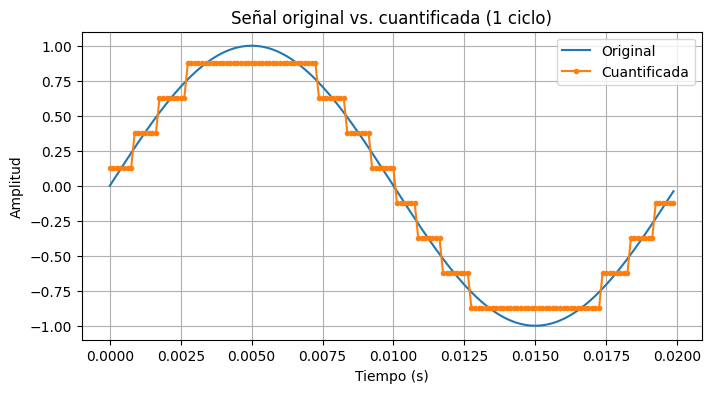

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ, snr, toDB

#? 1. Generaci√≥n de la se√±al sinusoidal
fs = 8000            # Frec. de muestreo
f = 50               # Frecuencia de la seno
t = np.arange(0, 1, 1/fs)  # Vector de tiempo, 1 s de duraci√≥n
x = np.sin(2 * np.pi * f * t)  # Se√±al sinusoidal

#? 2. Cuantificador uniforme de media contrahuella
b = 3
xRange = (-1, 1)  # Rango de la se√±al, pues x va de -1 a 1
qtz = UniformSQ(b, xRange, qtype='midrise')  # Cuantificador midrise
xq = qtz.quantize(x)                         # Se√±al cuantificada

#? 3. Representaci√≥n de la se√±al original y cuantificada en 1 ciclo (160 muestras)
nCiclo = 160
plt.figure(figsize=(8,4))
plt.plot(t[:nCiclo], x[:nCiclo], label='Original')
plt.plot(t[:nCiclo], xq[:nCiclo], label='Cuantificada', marker='o', markersize=3)
plt.title('Se√±al original vs. cuantificada (1 ciclo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### Preguntas:
 - **¬øCu√°ntos niveles de cuantificaci√≥n se aprecian?**

   Se aprecian 8 niveles (pues b=3 bits => $2^3=8$ niveles).

 - **¬øHay alg√∫n nivel de valor 0?**

   No, en midrise no se incluye el nivel 0 exactamente, por construcci√≥n.

 - **¬øEs este el resultado esperado?**

   S√≠, porque el cuantificador de media contrahuella desplaza los niveles
   de modo que no coincidan con 0.
___

### 2. C√°lculo de la potencia del error de cuantificaci√≥n y comparaci√≥n te√≥rica

1. Potencia experimental del error

   - Se define el error de cuantificaci√≥n como $e[n] = x[n] - x_q[n]$.
 
   - La potencia media del error (MSE) es $P_e = E[e^2[n]]$.
        Para mayor comodidad, podemos expresarla en decibelios usando $10 \log_{10}(P_e)$.

2. Potencia te√≥rica del error

   - Para un cuantificador uniforme midrise con paso $q$, la potencia del error (para una se√±al bien ajustada al rango) suele aproximarse por $q^2 / 12$.

   - Dado $q = 0.25$, $q^2 = 0.0625$. Entonces $\frac{q^2}{12} = \frac{0.0625}{12} \approx 0.0052083$.

   - En decibelios, $10 \log_{10}(0.0052083) \approx -22.83 \text{ dB}$.

In [6]:

#? 4. C√°lculo de la potencia del error
error = x - xq

# Calcular la potencia del error experimental
Pe = 0
for e in error:
        Pe += e**2
Pe /= len(error)

Pe_dB = 10 * np.log10(Pe)
q = (xRange[1] - xRange[0]) / 2**b  # = 2 / 8 = 0.25
Pe_teorica = q**2 / 12
Pe_teorica_dB = 10 * np.log10(Pe_teorica)

print(f"Potencia del error experimental (lineal): {Pe:.6f}")
print(f"Potencia del error experimental (dB): {Pe_dB:.2f} dB")
print(f"Potencia te√≥rica del error (lineal): {Pe_teorica:.6f}")
print(f"Potencia te√≥rica del error (dB): {Pe_teorica_dB:.2f} dB")


Potencia del error experimental (lineal): 0.006138
Potencia del error experimental (dB): -22.12 dB
Potencia te√≥rica del error (lineal): 0.005208
Potencia te√≥rica del error (dB): -22.83 dB


La potencia del error de cuantificaci√≥n uniforme se puede aproximar te√≥ricamente cuando se modela el error como una variable aleatoria uniforme en el intervalo $\left[-\frac{q}{2}, \frac{q}{2}\right]$, donde $q$ es el tama√±o del cuanto. Dado que la media de esta distribuci√≥n es cero, la potencia del error coincide con su varianza:

$$
P_e = \text{Var}(e) = \frac{q^2}{12}
$$

Esta expresi√≥n es v√°lida bajo la suposici√≥n de que la se√±al es suficientemente compleja y el error no est√° correlacionado con ella. Dado que la densidad es constante (distribuci√≥n uniforme), $f(e) = \frac{1}{q}$, la potencia es:

$$
P_e = \int_{-\frac{q}{2}}^{\frac{q}{2}} e^2 \cdot \frac{1}{q} \, de = \frac{1}{q} \int_{-\frac{q}{2}}^{\frac{q}{2}} e^2 \, de = \frac{1}{q} \left[\frac{e^3}{3}\right]_{-\frac{q}{2}}^{\frac{q}{2}} =\frac{1}{q} \frac{q^3}{12} = \frac{q^2}{12}
$$

Por ejemplo, si $q = 0.25$, entonces:

$$
P_e = \frac{0.25^2}{12} = \frac{0.0625}{12} \approx 0.005208
$$

Y en decibelios:

$$
P_{\text{dB}} = 10 \log_{10}(0.005208) \approx -22.83\ \text{dB}
$$

**La potencia experimental del error puede diferir ligeramente de la te√≥rica debido a:**
 - El uso de un n√∫mero finito de muestras (solo 1s de duraci√≥n).
 - La posible ligera desadaptaci√≥n del rango si la se√±al no ocupa perfectamente -1 a 1.
___

### 3. C√°lculo y representaci√≥n del espectro
- Para visualizar el espectro de la se√±al original y la se√±al cuantificada, podemos usar la Transformada R√°pida de Fourier (FFT).

- Observaremos c√≥mo la cuantificaci√≥n introduce distorsi√≥n (arm√≥nicos adicionales y ensanchamiento espectral).

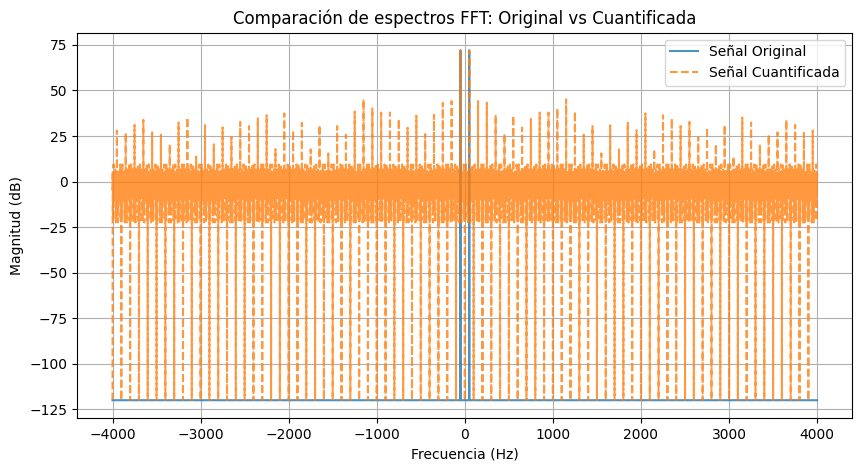

In [7]:

#? Funci√≥n auxiliar para obtener el espectro en dB y las frecuencias
def spectrum_db(signal, fs):
    """
    Calcula la FFT de 'signal', aplica shift y devuelve:
    - freq: eje de frecuencias centrado en 0
    - mag_db: magnitud del espectro en decibelios
    """
    N = len(signal)
    spectrum = np.fft.fft(signal)
    freq = np.fft.fftfreq(N, d=1/fs)
    # Centrar el espectro en 0
    spectrum = np.fft.fftshift(spectrum)
    freq = np.fft.fftshift(freq)
    # Evitar log(0) a√±adiendo un epsilon muy peque√±o
    mag_db = 10 * np.log10(np.abs(spectrum)**2 + 1e-12)
    return freq, mag_db

#? Caso: se√±al original x, se√±al cuantificada xq, ambas de longitud len(x)
# fs = frecuencia de muestreo
# Calculamos y representamos sus espectros juntos
freq_x, X_db = spectrum_db(x, fs)
freq_xq, Xq_db = spectrum_db(xq, fs)

plt.figure(figsize=(10, 5))
plt.plot(freq_x, X_db, label="Se√±al Original", alpha=0.8)
plt.plot(freq_xq, Xq_db, label="Se√±al Cuantificada", alpha=0.8, linestyle="--")
plt.title("Comparaci√≥n de espectros FFT: Original vs Cuantificada")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 3
Repita el **Ejercicio 2** a√±adiendo *dither* a la se√±al sinusoidal antes de cuantificarla.  
Para generar el *dither* puede usar la funci√≥n `genDither` incluida en *scalib*.  
Pruebe con los 3 tipos de *dither* mencionados anteriormente.  
Para cada uno, calcule su potencia de forma experimental y comp√°rela con la potencia te√≥rica esperada. Tenga en cuenta que al a√±adir el *dither*, la se√±al puede tomar valores fuera del rango de entrada del cuantificador $(-1, 1)$.

No olvide comparar tambi√©n la potencia experimental y te√≥rica del error de cuantificaci√≥n, y representar el espectro de la se√±al original y cuantificada, explicando los resultados obtenidos.
___

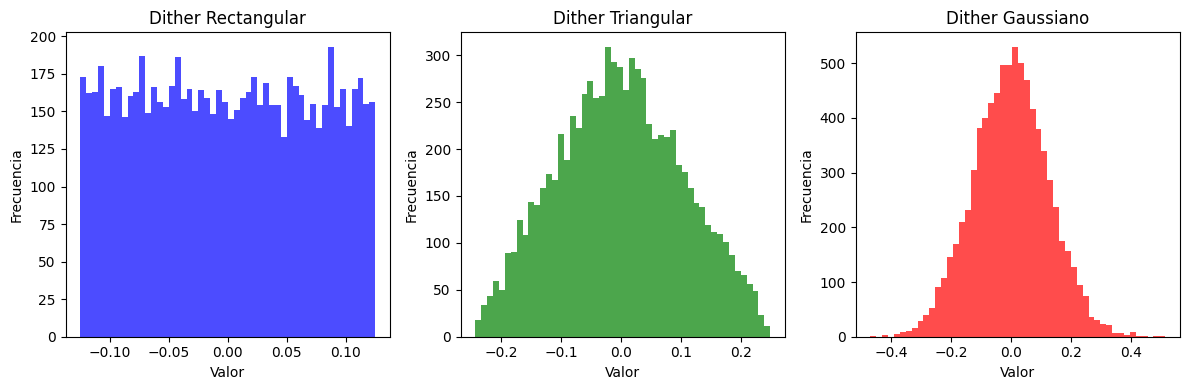

Potencia del dither (solo ruido agregado):
 Rectangular: Te√≥rica = -22.83 dB, Experimental = -22.79 dB
 Triangular:  Te√≥rica = -19.82 dB, Experimental = -19.66 dB
 Gaussiano:   Te√≥rica = -18.06 dB, Experimental = -18.08 dB

Potencia total (cuantificaci√≥n + dither):
 Rectangular: Te√≥rica = -19.82 dB, Experimental = -20.19 dB
 Triangular:  Te√≥rica = -18.06 dB, Experimental = -18.55 dB
 Gaussiano:   Te√≥rica = -16.81 dB, Experimental = -17.69 dB

Relaci√≥n se√±al-ruido (SNR):
 Dither Rectangular: 17.18 dB
 Dither Triangular:  15.54 dB
 Dither Gaussiano:   14.68 dB


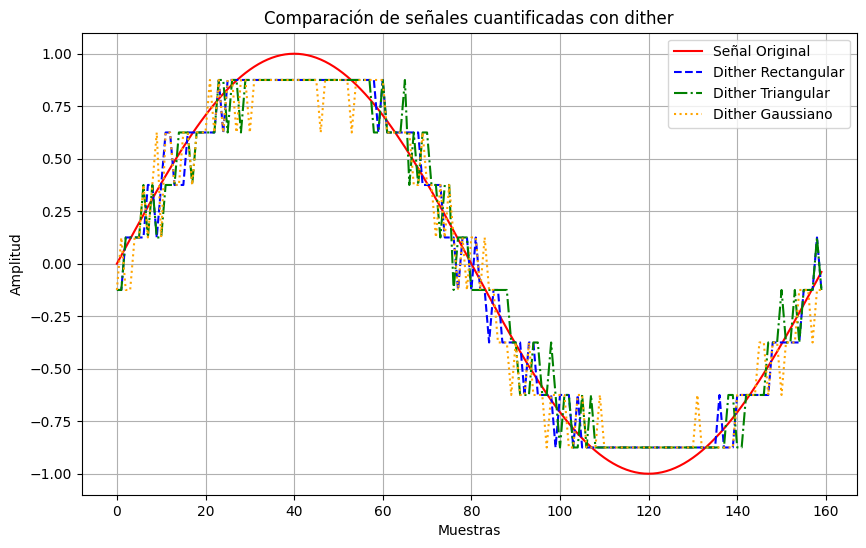

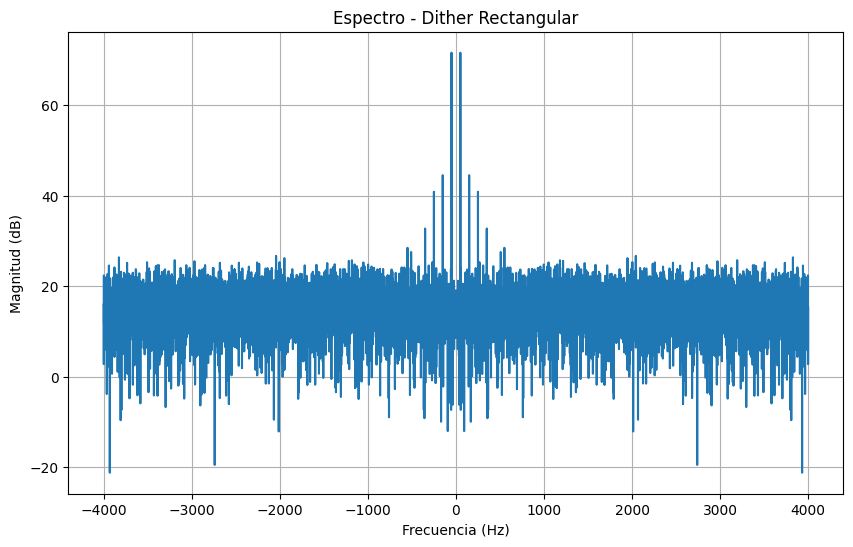

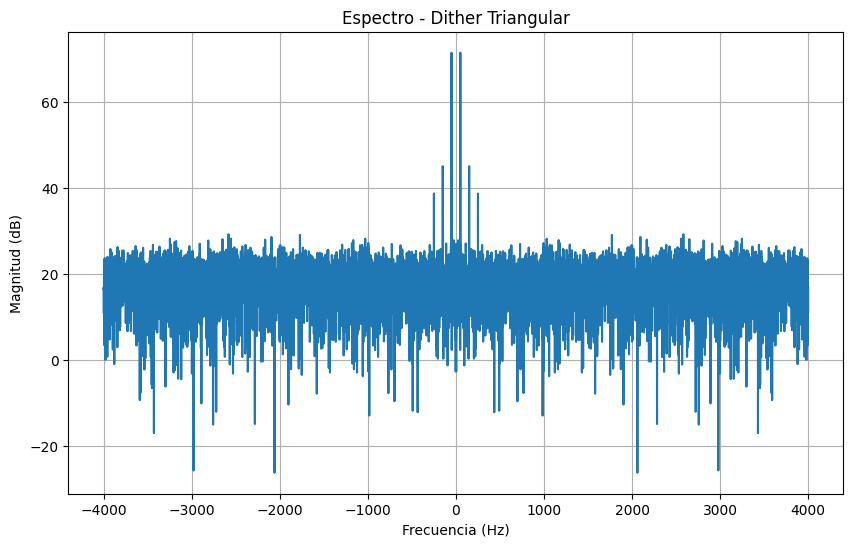

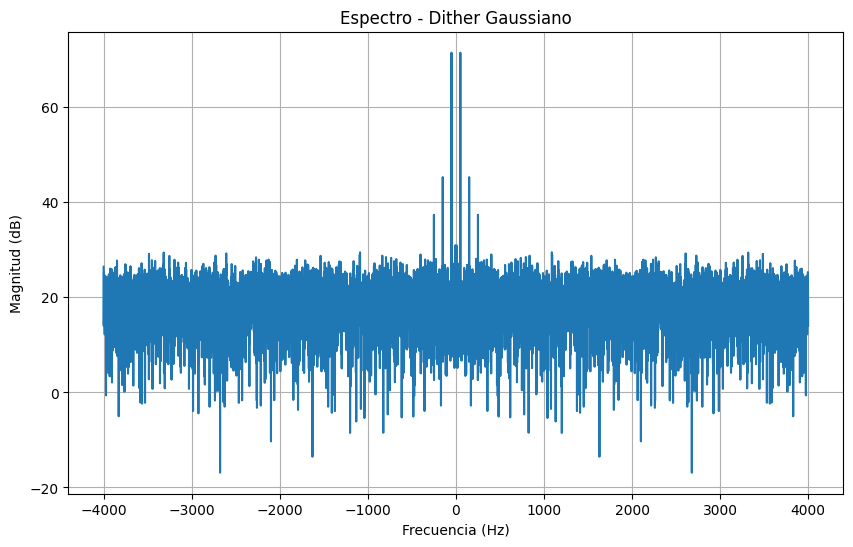

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ, genDither, snr

#? --- Configuraci√≥n inicial ---
# Par√°metros de la se√±al
sample_rate = 8000         # Frecuencia de muestreo (Hz)
signal_freq = 50           # Frecuencia de la se√±al (Hz)
duration = 1.0             # Duraci√≥n en segundos
time_vec = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
orig_signal = np.sin(2 * np.pi * signal_freq * time_vec)  # Se√±al senoidal

# Par√°metros del cuantificador
bits = 3
min_val, max_val = -1, 1
step_size = (max_val - min_val) / (2 ** bits)  # Tama√±o del cuanto (q)

# Crear cuantificador uniforme de tipo midrise (media contrahuella)
quant = UniformSQ(bits, (min_val, max_val), qtype="midrise")

#? --- Generaci√≥n de dither ---
# Se generan 3 dither con distribuciones diferentes
dither_rect = genDither(len(orig_signal), step_size, pdf="rectangular")
dither_tri  = genDither(len(orig_signal), step_size, pdf="triangular")
dither_gauss = genDither(len(orig_signal), step_size, pdf="gaussian")

# Visualizar histogramas de los dither
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(dither_rect, bins=50, color="blue", alpha=0.7)
plt.title("Dither Rectangular")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 2)
plt.hist(dither_tri, bins=50, color="green", alpha=0.7)
plt.title("Dither Triangular")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 3)
plt.hist(dither_gauss, bins=50, color="red", alpha=0.7)
plt.title("Dither Gaussiano")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

#? --- Aplicaci√≥n del dither y cuantificaci√≥n ---
# Se a√±ade el dither a la se√±al original
signal_rect = orig_signal + dither_rect
signal_tri  = orig_signal + dither_tri
signal_gauss = orig_signal + dither_gauss

# Cuantificar las se√±ales con dither aplicado
quant_rect = quant.quantize(signal_rect)
quant_tri  = quant.quantize(signal_tri)
quant_gauss = quant.quantize(signal_gauss)

#? --- C√°lculos de potencia ---
# Las potencias te√≥ricas del dither se derivan de:
# Rectangular:  q^2 / 12, Triangular:  q^2 / 6, Gaussiano:  q^2 / 4
P_dither_rect_theo = step_size**2 / 12
P_dither_tri_theo  = step_size**2 / 6
P_dither_gauss_theo = step_size**2 / 4

# Potencias experimentales de los dither
P_dither_rect_exp = np.mean(dither_rect**2)
P_dither_tri_exp  = np.mean(dither_tri**2)
P_dither_gauss_exp = np.mean(dither_gauss**2)

# Para el error total (cuantificaci√≥n + dither), se asume que se suma el ruido de cuantificaci√≥n 
# (aproximadamente q^2/12) y la potencia del dither.
P_total_rect_theo = step_size**2 / 12 + P_dither_rect_theo
P_total_tri_theo  = step_size**2 / 12 + P_dither_tri_theo
P_total_gauss_theo = step_size**2 / 12 + P_dither_gauss_theo

# Funci√≥n para pasar a decibelios
def to_dB(power):
    return 10 * np.log10(power)

# Conversi√≥n a dB (te√≥rico y experimental)
P_dither_rect_theo_dB = to_dB(P_dither_rect_theo)
P_dither_tri_theo_dB  = to_dB(P_dither_tri_theo)
P_dither_gauss_theo_dB = to_dB(P_dither_gauss_theo)

P_dither_rect_exp_dB = to_dB(P_dither_rect_exp)
P_dither_tri_exp_dB  = to_dB(P_dither_tri_exp)
P_dither_gauss_exp_dB = to_dB(P_dither_gauss_exp)

P_total_rect_theo_dB = to_dB(P_total_rect_theo)
P_total_tri_theo_dB  = to_dB(P_total_tri_theo)
P_total_gauss_theo_dB = to_dB(P_total_gauss_theo)

# Error experimental: diferencia entre se√±al original y cuantificada
error_rect = orig_signal - quant_rect
error_tri  = orig_signal - quant_tri
error_gauss = orig_signal - quant_gauss

P_error_rect_exp = np.var(error_rect)
P_error_tri_exp  = np.var(error_tri)
P_error_gauss_exp = np.var(error_gauss)

P_error_rect_exp_dB = to_dB(P_error_rect_exp)
P_error_tri_exp_dB  = to_dB(P_error_tri_exp)
P_error_gauss_exp_dB = to_dB(P_error_gauss_exp)

#? --- Mostrar resultados en consola ---
print("Potencia del dither (solo ruido agregado):")
print(f" Rectangular: Te√≥rica = {P_dither_rect_theo_dB:.2f} dB, Experimental = {P_dither_rect_exp_dB:.2f} dB")
print(f" Triangular:  Te√≥rica = {P_dither_tri_theo_dB:.2f} dB, Experimental = {P_dither_tri_exp_dB:.2f} dB")
print(f" Gaussiano:   Te√≥rica = {P_dither_gauss_theo_dB:.2f} dB, Experimental = {P_dither_gauss_exp_dB:.2f} dB\n")

print("Potencia total (cuantificaci√≥n + dither):")
print(f" Rectangular: Te√≥rica = {P_total_rect_theo_dB:.2f} dB, Experimental = {P_error_rect_exp_dB:.2f} dB")
print(f" Triangular:  Te√≥rica = {P_total_tri_theo_dB:.2f} dB, Experimental = {P_error_tri_exp_dB:.2f} dB")
print(f" Gaussiano:   Te√≥rica = {P_total_gauss_theo_dB:.2f} dB, Experimental = {P_error_gauss_exp_dB:.2f} dB\n")

# Calcular la SNR para cada caso
SNR_rect = snr(orig_signal, quant_rect)
SNR_tri  = snr(orig_signal, quant_tri)
SNR_gauss = snr(orig_signal, quant_gauss)

print("Relaci√≥n se√±al-ruido (SNR):")
print(f" Dither Rectangular: {SNR_rect:.2f} dB")
print(f" Dither Triangular:  {SNR_tri:.2f} dB")
print(f" Dither Gaussiano:   {SNR_gauss:.2f} dB")

#? --- Graficar segmentos de las se√±ales ---
plt.figure(figsize=(10, 6))
plt.plot(orig_signal[:160], label="Se√±al Original", color="red")
plt.plot(quant_rect[:160], label="Dither Rectangular", color="blue", linestyle="--")
plt.plot(quant_tri[:160], label="Dither Triangular", color="green", linestyle="-.")
plt.plot(quant_gauss[:160], label="Dither Gaussiano", color="orange", linestyle=":")
plt.title("Comparaci√≥n de se√±ales cuantificadas con dither")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

#? --- Funci√≥n para graficar el espectro (FFT) ---
def plot_fft(signal, title, fs):
    """
    Usa la funci√≥n 'spectrum_db' para calcular el espectro en dB y lo grafica.
    """
    freq, mag_db = spectrum_db(signal, fs)
    plt.figure(figsize=(10, 6))
    plt.plot(freq, mag_db)
    plt.title(title)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.grid(True)
    plt.show()

# Representamos el espectro para cada se√±al cuantificada con dither
plot_fft(quant_rect, "Espectro - Dither Rectangular", sample_rate)
plot_fft(quant_tri, "Espectro - Dither Triangular", sample_rate)
plot_fft(quant_gauss, "Espectro - Dither Gaussiano", sample_rate)

# Ejercicio 4
Cargue la se√±al de audio almacenada en el archivo `altura.wav` y cuantif√≠quela usando un cuantificador uniforme de media contrahuella con una tasa de 3 bits por muestra.  
Repita el proceso de cuantificaci√≥n a√±adiendo previamente *dither* triangular a la se√±al.  

Reproduzca las dos se√±ales cuantificadas (con y sin *dither*) y comente la calidad percibida de la se√±al en cada caso.  
Compare tambi√©n las dos se√±ales en t√©rminos de **SNR**.

Repita la cuantificaci√≥n de la se√±al con y sin *dither* usando un cuantificador de 5 bits por muestra. Compare las dos se√±ales cuantificadas en t√©rminos de calidad percibida y **SNR**.
___

In [17]:
import numpy as np
import scipy.io.wavfile as wf
import sounddevice as sd
from scalib import UniformSQ, genDither, snr, signalRange

#? --- Cargar la se√±al de audio ---
frecuencia_muestreo, senal_audio = wf.read("Datos/altura.wav")
tiempo = np.arange(len(senal_audio)) / frecuencia_muestreo
rango_senal = signalRange(senal_audio)

def cuantificar_con_dither(senal, bits, tipo_dither="triangular"):
    """
    Cuantifica la se√±al utilizando un cuantificador uniforme (midrise),
    con y sin adici√≥n de dither.

    Par√°metros:
      senal: Se√±al de entrada.
      bits: Bits por muestra.
      tipo_dither: Tipo de dither ("rectangular", "triangular", "gaussian").

    Devuelve:
      cuant_sin_dither: Se√±al cuantificada sin dither.
      cuant_con_dither: Se√±al cuantificada con dither.
      snr_sin: SNR de la cuantificaci√≥n sin dither.
      snr_con: SNR con dither.
    """
    cuantificador = UniformSQ(bits, rango_senal, qtype="midrise")
    paso_cuanto = (rango_senal[1] - rango_senal[0]) / (2**bits)

    cuant_sin_dither = cuantificador.quantize(senal)

    ruido_dither = genDither(len(senal), paso_cuanto, pdf=tipo_dither)
    senal_con_ruido = senal + ruido_dither
    cuant_con_dither = cuantificador.quantize(senal_con_ruido)

    snr_sin = snr(senal, cuant_sin_dither)
    snr_con = snr(senal, cuant_con_dither)

    return cuant_sin_dither, cuant_con_dither, snr_sin, snr_con

#? --- Cuantificaci√≥n con 3 bits ---
bits_3 = 3
cuant_3_sin, cuant_3_con, snr_3_sin, snr_3_con = cuantificar_con_dither(senal_audio, bits_3)

print("Reproduciendo se√±al cuantificada sin dither (3 bits)...")
sd.play(cuant_3_sin, frecuencia_muestreo)
sd.wait()

print("Reproduciendo se√±al cuantificada con dither (3 bits)...")
sd.play(cuant_3_con, frecuencia_muestreo)
sd.wait()

print(f"SNR sin dither (3 bits): {snr_3_sin:.2f} dB")
print(f"SNR con dither (3 bits): {snr_3_con:.2f} dB")

#? --- Cuantificaci√≥n con 5 bits ---
bits_5 = 5
cuant_5_sin, cuant_5_con, snr_5_sin, snr_5_con = cuantificar_con_dither(senal_audio, bits_5)

print("Reproduciendo se√±al cuantificada sin dither (5 bits)...")
sd.play(cuant_5_sin, frecuencia_muestreo)
sd.wait()

print("Reproduciendo se√±al cuantificada con dither (5 bits)...")
sd.play(cuant_5_con, frecuencia_muestreo)
sd.wait()

print(f"SNR sin dither (5 bits): {snr_5_sin:.2f} dB")
print(f"SNR con dither (5 bits): {snr_5_con:.2f} dB")


Reproduciendo se√±al cuantificada sin dither (3 bits)...
Reproduciendo se√±al cuantificada con dither (3 bits)...
SNR sin dither (3 bits): -1.43 dB
SNR con dither (3 bits): -3.09 dB
Reproduciendo se√±al cuantificada sin dither (5 bits)...
Reproduciendo se√±al cuantificada con dither (5 bits)...
SNR sin dither (5 bits): 11.38 dB
SNR con dither (5 bits): 8.96 dB


# Ejercicio 5
Cargue la imagen de Lena (archivo `lena.png`) en escala de grises y cuantif√≠quela usando un cuantificador uniforme de media contrahuella con una tasa de 3 bits por muestra.  

Repita el proceso de cuantificaci√≥n a√±adiendo previamente a la se√±al *dither* triangular con una amplitud m√°xima de $q/5$, siendo $q$ el valor del cuanto del cuantificador.  

Calcule la **SNR** en ambos casos. Represente la imagen original y las dos im√°genes cuantificadas. Explique el resultado.
___

SNR sin dither: 20.35 dB
SNR con dither: 20.00 dB


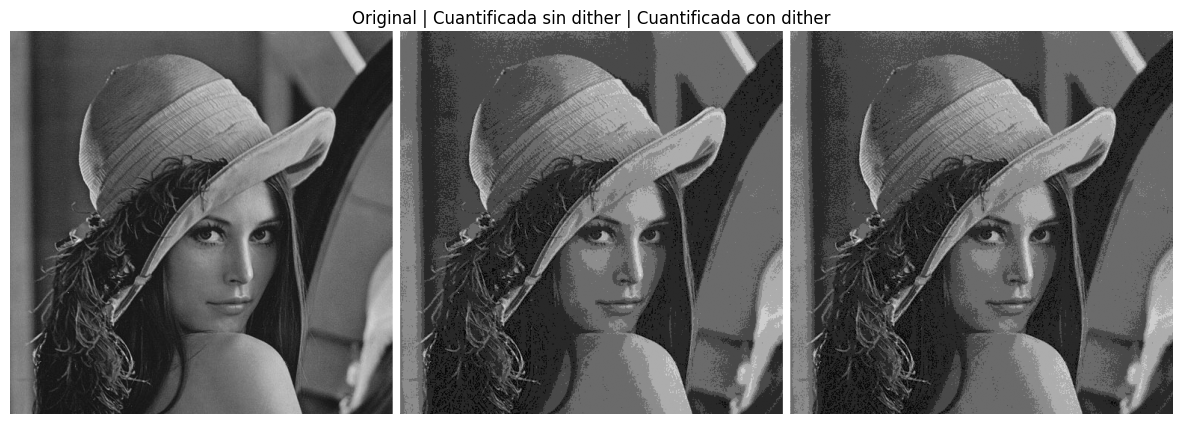

In [ ]:

#? --- Cargar y preparar la imagen ---
# Cargar la imagen de Lena y convertirla a escala de grises
imagen_rgb = io.imread("Datos/lena.png")
imagen_gris = color.rgb2gray(imagen_rgb)

# Obtener el rango din√°mico de la imagen en escala de grises
rango_gris = signalRange(imagen_gris)

#? --- Configuraci√≥n del cuantificador ---
# Se realiza la cuantificaci√≥n con 3 bits usando un cuantificador de media contrahuella (midrise)
bits = 3
cuantificador = UniformSQ(bits, rango_gris, qtype="midrise")
# Cuantificar la imagen original (sin dither)
imagen_cuantificada = cuantificador.quantize(imagen_gris)

# Calcular el tama√±o del cuanto (q)
q_tamano = (rango_gris[1] - rango_gris[0]) / (2**bits)

#? --- Aplicaci√≥n de dither ---
# Generar dither triangular con amplitud m√°xima q_tamano/5
ruido_dither = genDither(imagen_gris.shape, q_tamano / 5, pdf="triangular")
# A√±adir el dither a la imagen original
imagen_ruidosa = imagen_gris + ruido_dither
# Cuantificar la imagen con dither
imagen_cuantificada_dither = cuantificador.quantize(imagen_ruidosa)

#? --- C√°lculo de SNR ---
# Calcular la SNR para la imagen cuantificada sin dither y con dither
snr_sin_dither = snr(imagen_gris, imagen_cuantificada)
snr_con_dither = snr(imagen_gris, imagen_cuantificada_dither)

print(f"SNR sin dither: {snr_sin_dither:.2f} dB")
print(f"SNR con dither: {snr_con_dither:.2f} dB")

#? --- Visualizaci√≥n en un √∫nico plot ---
# Para facilitar la comparaci√≥n, concatenamos las im√°genes original, cuantificada sin dither
# y cuantificada con dither en una sola imagen con separadores verticales
separador = np.ones((imagen_gris.shape[0], 10))
imagen_combinada = np.hstack((imagen_gris, separador, imagen_cuantificada, separador, imagen_cuantificada_dither))

plt.figure(figsize=(15, 5))
plt.imshow(imagen_combinada, cmap="gray")
plt.axis("off")
plt.title("Original | Cuantificada sin dither | Cuantificada con dither")
plt.show()


# Ejercicio 6

Cargue la imagen de Lena (archivo `lena.png`) en color y cuantif√≠quela usando un cuantificador uniforme de media contrahuella y 3 bits por muestra. A continuaci√≥n, implemente la t√©cnica de *dithering* de **Floyd-Steinberg** y repita el proceso de cuantificaci√≥n de la imagen de Lena usando esta t√©cnica.

Calcule la **SNR** de las dos im√°genes cuantificadas. Represente en una misma figura la imagen original, la imagen cuantificada con el cuantificador uniforme y la imagen cuantificada usando *dithering* de Floyd-Steinberg. Compare las dos im√°genes cuantificadas en t√©rminos de calidad percibida y **SNR**.
___

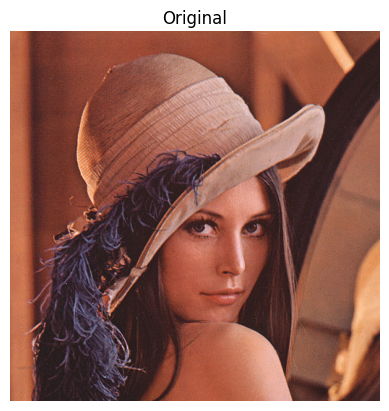

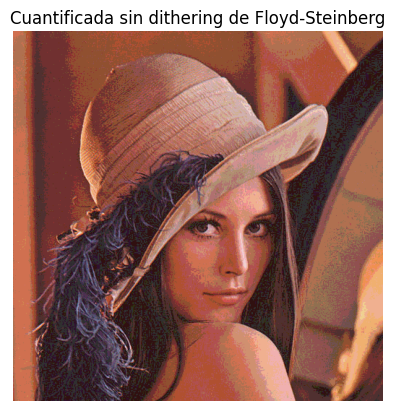

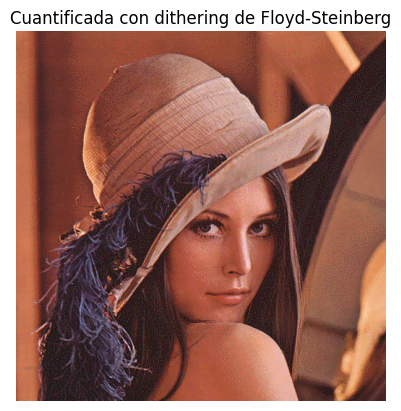

SNR (sin dithering): 21.16 dB
SNR (Floyd-Steinberg): 21.62 dB


In [20]:
# ---------------------------------------------------------
# Algoritmo de Floyd-Steinberg para imagen en color
# ---------------------------------------------------------

#? Definir par√°metros de cuantificaci√≥n
imagen = io.imread("Datos/lena.png")


rango_imagen = signalRange(imagen)
bits = 3
cuantificador = UniformSQ(bits, rango_imagen, qtype="midrise")

#? Crear arrays para almacenar la imagen cuantificada (sin dithering) y la imagen resultante del algoritmo de Floyd-Steinberg
imagen_cuant = np.zeros_like(imagen)
imagen_floyd = np.zeros_like(imagen)

#? Recorrer la imagen y aplicar Floyd-Steinberg en cada p√≠xel (y cada canal)
for fila in range(imagen.shape[0]):
    for col in range(imagen.shape[1]):
        for canal in range(imagen.shape[2]):  # Para cada canal (R, G, B)
            # Cuantificar el p√≠xel actual
            pixel_cuant = cuantificador.quantize(imagen[fila, col, canal])
            imagen_cuant[fila, col, canal] = pixel_cuant

            # Calcular el error entre el valor original y el cuantificado
            error_pixel = float(imagen[fila, col, canal]) - float(pixel_cuant)

            # A√±adir la componente cuantificada al array Floyd-Steinberg
            # (Este array se ir√° modificando al propagar el error)
            imagen_floyd[fila, col, canal] += pixel_cuant

            # Distribuir el error entre los p√≠xeles vecinos
            # (s√≥lo si est√°n dentro de los l√≠mites de la imagen)
            if col + 1 < imagen.shape[1]:
                imagen_floyd[fila, col + 1, canal] += error_pixel * (7 / 16)

            if fila + 1 < imagen.shape[0] and col - 1 >= 0:
                imagen_floyd[fila + 1, col - 1, canal] += error_pixel * (3 / 16)

            if fila + 1 < imagen.shape[0]:
                imagen_floyd[fila + 1, col, canal] += error_pixel * (5 / 16)

            if fila + 1 < imagen.shape[0] and col + 1 < imagen.shape[1]:
                imagen_floyd[fila + 1, col + 1, canal] += error_pixel * (1 / 16)

#? Mostrar las tres versiones de la imagen
plt.figure()
plt.imshow(imagen)
plt.title("Original")
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(imagen_cuant)
plt.title("Cuantificada sin dithering de Floyd-Steinberg")
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(imagen_floyd)
plt.title("Cuantificada con dithering de Floyd-Steinberg")
plt.axis("off")
plt.show()

#? Calcular la SNR de ambas im√°genes cuantificadas
snr_sin_dither = snr(imagen, imagen_cuant)
snr_floyd = snr(imagen, imagen_floyd)

print(f"SNR (sin dithering): {snr_sin_dither:.2f} dB")
print(f"SNR (Floyd-Steinberg): {snr_floyd:.2f} dB")
